<a href="https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao18_DeteccaoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação do wrapper keras-facenet

Instala as dependências (mtcnn, opencv2, keras-facenet)

In [1]:
!pip install keras-facenet

## Detecção de face

In [2]:
import mtcnn 
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving unnamed_jpg.rf.8bacd81300f96cc2abf8845595a2e160.jpg to unnamed_jpg.rf.8bacd81300f96cc2abf8845595a2e160.jpg
User uploaded file "unnamed_jpg.rf.8bacd81300f96cc2abf8845595a2e160.jpg" with length 34886 bytes


In [4]:
image = Image.open(fn)
image = image.convert('RGB')
pixels = asarray(image)

In [5]:
# create the detector, using default weights
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [20, 45, 43, 50], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (36, 62), 'right_eye': (56, 66), 'nose': (46, 74), 'mouth_left': (33, 82), 'mouth_right': (50, 86)}}
{'box': [48, 86, 73, 81], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (69, 115), 'right_eye': (102, 112), 'nose': (86, 135), 'mouth_left': (75, 150), 'mouth_right': (101, 147)}}
{'box': [398, 67, 34, 38], 'confidence': 0.9999954700469971, 'keypoints': {'left_eye': (412, 83), 'right_eye': (427, 81), 'nose': (422, 91), 'mouth_left': (414, 97), 'mouth_right': (427, 97)}}
{'box': [331, 66, 27, 32], 'confidence': 0.9999109506607056, 'keypoints': {'left_eye': (340, 77), 'right_eye': (353, 77), 'nose': (346, 83), 'mouth_left': (341, 90), 'mouth_right': (351, 90)}}
{'box': [318, 24, 24, 29], 'confidence': 0.9997254014015198, 'keypoints': {'left_eye': (328, 36), 'right_eye': (339, 36), 'nose': (336, 42), 'mouth_left': (330, 48), 'mouth_right': (339, 48)}}
{'box': [367, 51, 21, 30], 'confidence':

In [6]:
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

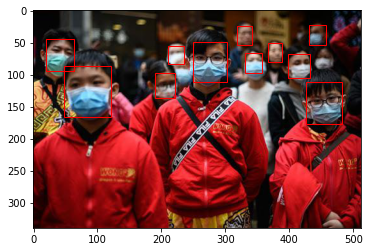

In [7]:
draw_image_with_boxes(fn, faces)

## Marcar keypoints do rosto

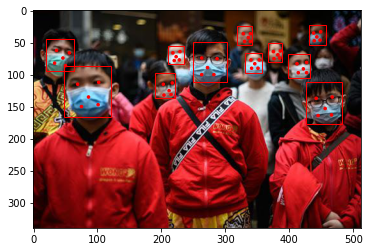

In [8]:
# draw an image with detected objects
def draw_image_with_keypoints(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
# display faces on the original image
draw_image_with_keypoints(fn, faces)

## Cropar rostos

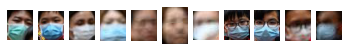

In [10]:
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
draw_faces(fn, faces)